<a href="https://colab.research.google.com/github/saimaayub/DS-project/blob/main/final_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import necessary libraries
import os
import pandas as pd

# Step 3: Define the paths to the CSV files
csv_file_paths = [
    '/content/drive/MyDrive/50DailyData.csv',
    '/content/drive/MyDrive/51DailyData.csv',
    '/content/drive/MyDrive/101DailyData.csv'
]

# Step 4: Load each CSV file into a DataFrame and store them in a list
dataframes = []
for file_path in csv_file_paths:
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Step 5: Concatenate all DataFrames into a single DataFrame
merged_df1 = pd.concat(dataframes, ignore_index=True)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
merged_df1.head()

,index,Date,Average KWH per Day
0,0,2012-05-18,0.177275
1,1,2012-05-19,0.177462
2,2,2012-05-20,0.189562
3,3,2012-05-21,0.229199
4,4,2012-05-22,0.170351


In [ ]:
# Convert the 'DateTime' column to datetime format if it is not already
merged_df1['Date'] = pd.to_datetime(merged_df1['Date'])

# Step 6: Group by Date and calculate the mean of 'KWH/hh (per half hour)'
daily_data = merged_df1.groupby(merged_df1['Date'].dt.date)['Average KWH per Day'].mean().reset_index()

# Rename the columns for clarity
daily_data.columns = ['Date', 'Average KWH']

# Verify the daily_data DataFrame
print(f"Daily data shape: {daily_data.shape}")
print(daily_data.head())

# Save the daily_data DataFrame to a new CSV file (optional)
daily_csv_file_path = '/content/drive/MyDrive/LCL-Final-Merged-DailyData.csv'
daily_data.to_csv(daily_csv_file_path, index=False)

print(f"Daily data saved to: {daily_csv_file_path}")


Daily data shape: (652, 2)
         Date  Average KWH
0  2012-05-18     0.177275
1  2012-05-19     0.177462
2  2012-05-20     0.189562
3  2012-05-21     0.222067
4  2012-05-22     0.163837
Daily data saved to: /content/drive/MyDrive/LCL-Final-Merged-DailyData.csv


In [ ]:
print("Energy data date range:", merged_df1['Date'].min(), merged_df1['Date'].max())

Energy data date range: 2012-05-18 00:00:00 2014-02-28 00:00:00


In [ ]:
print("Energy data consumption range:", merged_df1['Average KWH per Day'].min(), merged_df1['Average KWH per Day'].max())

Energy data consumption range: 0.1332413793103448 0.3905631318813131


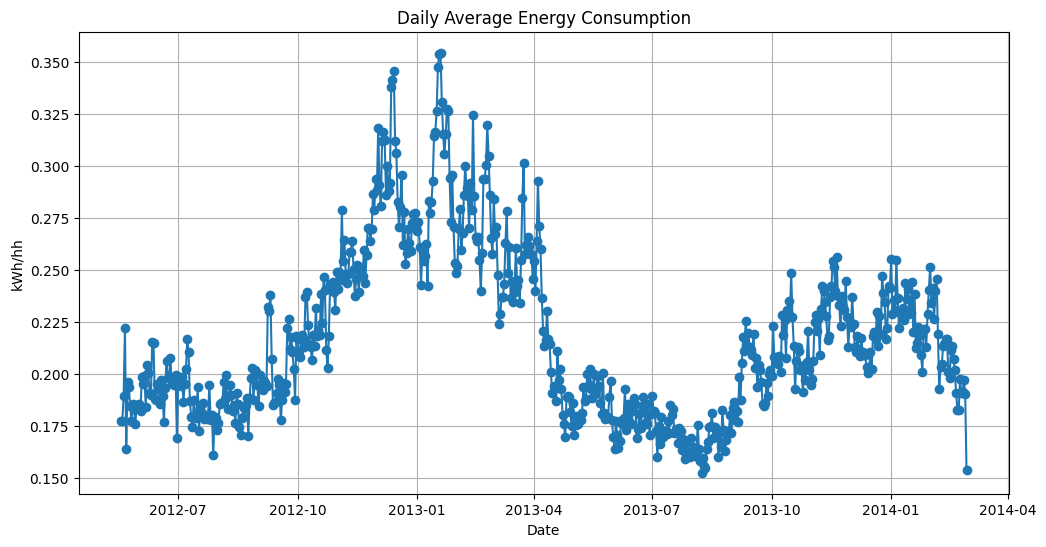

In [ ]:
#plotting the data
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Date'], daily_data['Average KWH'], marker='o', linestyle='-')
plt.title('Daily Average Energy Consumption')
plt.xlabel('Date')
plt.ylabel('kWh/hh')
plt.grid(True)
plt.show()

In [ ]:
print(daily_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         652 non-null    object 
 1   Average KWH  652 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.3+ KB
None


In [ ]:
file_path = '/content/drive/My Drive/weather-data.csv'

# Read the CSV file into a DataFrame
weatherdf = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify
print(weatherdf.head())

         time  weather_code (wmo code)  temperature_2m_max (°C)  \
0  01/11/2011                       51                     15.0   
1  02/11/2011                       51                     14.2   
2  03/11/2011                       53                     15.6   
3  04/11/2011                       61                     14.9   
4  05/11/2011                       51                     13.9   

   temperature_2m_min (°C)  temperature_2m_mean (°C)  \
0                      8.9                      13.1   
1                      8.4                      11.4   
2                     12.9                      14.6   
3                     11.1                      12.7   
4                      8.6                      11.4   

   apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                           13.2                            7.1   
1                           12.1                            6.0   
2                           13.7                           

In [ ]:
# Convert the time column to datetime format with dayfirst=True
weatherdf['Date'] = pd.to_datetime(weatherdf['time'], dayfirst=True)

# Display the DataFrame to verify the conversion
weatherdf.head()

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),Date
0,01/11/2011,51,15.0,8.9,13.1,13.2,7.1,11.3,2011-11-01T07:53,2011-11-01T17:34,34876.89,23635.93,0.9,0.9,5,18.8,205,2011-11-01
1,02/11/2011,51,14.2,8.4,11.4,12.1,6.0,8.6,2011-11-02T07:55,2011-11-02T17:33,34662.17,24176.65,1.6,1.6,5,23.4,142,2011-11-02
2,03/11/2011,53,15.6,12.9,14.6,13.7,11.9,12.8,2011-11-03T07:57,2011-11-03T17:31,34448.32,899.05,4.1,4.1,15,25.8,163,2011-11-03
3,04/11/2011,61,14.9,11.1,12.7,12.8,10.2,11.4,2011-11-04T07:59,2011-11-04T17:29,34235.54,10425.34,12.8,12.8,16,19.6,177,2011-11-04
4,05/11/2011,51,13.9,8.6,11.4,12.0,7.5,9.7,2011-11-05T08:00,2011-11-05T17:27,34024.06,6934.98,0.4,0.4,4,19.0,355,2011-11-05


In [ ]:
import pandas as pd

missing_values_per_column = weatherdf.isnull().sum()

print(missing_values_per_column)

time                               0
weather_code (wmo code)            0
temperature_2m_max (°C)            0
temperature_2m_min (°C)            0
temperature_2m_mean (°C)           0
apparent_temperature_max (°C)      0
apparent_temperature_min (°C)      0
apparent_temperature_mean (°C)     0
sunrise (iso8601)                  0
sunset (iso8601)                   0
daylight_duration (s)              0
sunshine_duration (s)              0
precipitation_sum (mm)             0
rain_sum (mm)                      0
precipitation_hours (h)            0
wind_speed_10m_max (km/h)          0
wind_direction_10m_dominant (°)    0
Date                               0
dtype: int64


In [ ]:
# Create a new column 'DateTime' which is just the date part of the 'time' column so we have same column name for day in both datasets
weatherdf['Date'] = weatherdf['Date'].dt.date

In [ ]:
merged_df = pd.merge(daily_data, weatherdf, on='Date')
print(merged_df.head())

         Date  Average KWH        time  weather_code (wmo code)  \
0  2012-05-18     0.177275  18/05/2012                       51   
1  2012-05-19     0.177462  19/05/2012                        3   
2  2012-05-20     0.189562  20/05/2012                       51   
3  2012-05-21     0.222067  21/05/2012                        3   
4  2012-05-22     0.163837  22/05/2012                        3   

   temperature_2m_max (°C)  temperature_2m_min (°C)  temperature_2m_mean (°C)  \
0                     15.1                      8.0                      11.9   
1                     16.8                      9.6                      13.1   
2                     15.0                      7.2                      10.8   
3                     17.2                      8.4                      12.3   
4                     23.0                      9.6                      16.2   

   apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                           13.4           

In [ ]:
print("Energy data date range:", daily_data['Date'].min(), daily_data['Date'].max())
print("Weather data date range:", weatherdf['Date'].min(), weatherdf['Date'].max())

Energy data date range: 2012-05-18 2014-02-28
Weather data date range: 2011-11-01 2014-02-28


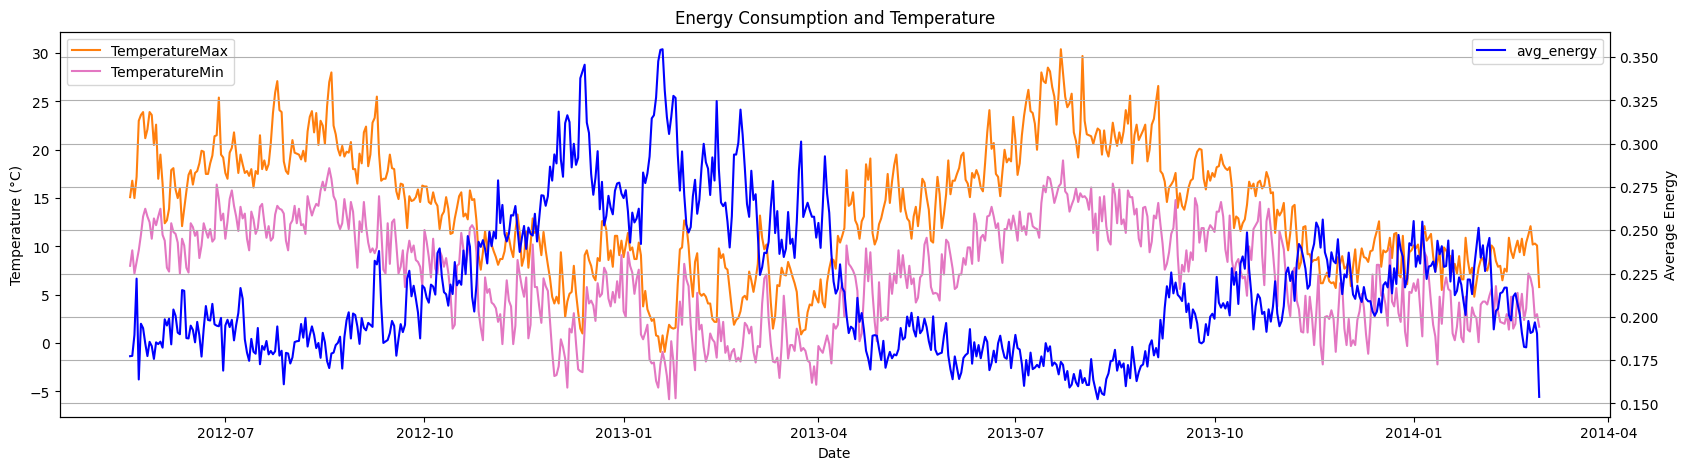

In [ ]:
# Plotting
fig, ax1 = plt.subplots(figsize=(20, 5))

# Plot temperature data
ax1.plot(merged_df['Date'], merged_df['temperature_2m_max (°C)'], color='tab:orange', label='TemperatureMax')
ax1.plot(merged_df['Date'], merged_df['temperature_2m_min (°C)'], color='tab:pink', label='TemperatureMin')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)')
ax1.legend(loc='upper left')
# Create a second y-axis for energy consumption
ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_df['Average KWH'], color='blue', label='avg_energy')
ax2.set_ylabel('Average Energy')
ax2.legend(loc='upper right')
# Title and grid
plt.title('Energy Consumption and Temperature')
plt.grid()

plt.show()

In [ ]:
# Select only numeric columns
numeric_cols = ['Average KWH', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)',
                'temperature_2m_mean (°C)', 'apparent_temperature_max (°C)',
                'apparent_temperature_min (°C)', 'apparent_temperature_mean (°C)',
                'daylight_duration (s)', 'sunshine_duration (s)', 'precipitation_sum (mm)',
                'rain_sum (mm)', 'precipitation_hours (h)', 'wind_speed_10m_max (km/h)',
                'wind_direction_10m_dominant (°)']
# Ensure these columns exist in your DataFrame
numeric_cols = [col for col in numeric_cols if col in merged_df.columns]

# Calculate the correlation matrix for numeric columns
cor_matrix = merged_df[numeric_cols].corr()

# Display the correlation matrix
cor_matrix

,Average KWH,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°)
Average KWH,1.000000,-0.809493,-0.737777,-0.797130,-0.780285,-0.740729,-0.777642,-0.719163,-0.530457,0.068417,0.036542,0.091715,0.143114,-0.075580
temperature_2m_max (°C),-0.809493,1.000000,0.908114,0.980787,0.987518,0.927994,0.978586,0.727744,0.547600,-0.063890,-0.037875,-0.116702,-0.227628,0.063707
temperature_2m_min (°C),-0.737777,0.908114,1.000000,0.966025,0.895182,0.984767,0.949249,0.640874,0.350575,0.057315,0.078649,0.049243,-0.103519,0.078802
temperature_2m_mean (°C),-0.797130,0.980787,0.966025,1.000000,0.967713,0.971274,0.989509,0.702588,0.465494,-0.006833,0.017717,-0.039861,-0.168901,0.075386
apparent_temperature_max (°C),-0.780285,0.987518,0.895182,0.967713,1.000000,0.929247,0.984521,0.707225,0.509098,-0.057475,-0.032947,-0.110803,-0.330823,0.050561
apparent_temperature_min (°C),-0.740729,0.927994,0.984767,0.971274,0.929247,1.000000,0.974631,0.650896,0.363127,0.022780,0.044694,0.006155,-0.223006,0.066136
apparent_temperature_mean (°C),-0.777642,0.978586,0.949249,0.989509,0.984521,0.974631,1.000000,0.694490,0.449557,-0.026500,-0.002854,-0.062335,-0.288377,0.062477
daylight_duration (s),-0.719163,0.727744,0.640874,0.702588,0.707225,0.650896,0.694490,1.000000,0.583150,-0.062258,-0.050605,-0.055138,-0.237091,-0.086926
sunshine_duration (s),-0.530457,0.547600,0.350575,0.465494,0.509098,0.363127,0.449557,0.583150,1.000000,-0.295411,-0.279256,-0.360921,-0.196562,-0.025494
precipitation_sum (mm),0.068417,-0.063890,0.057315,-0.006833,-0.057475,0.022780,-0.026500,-0.062258,-0.295411,1.000000,0.993737,0.828139,0.344226,-0.036344


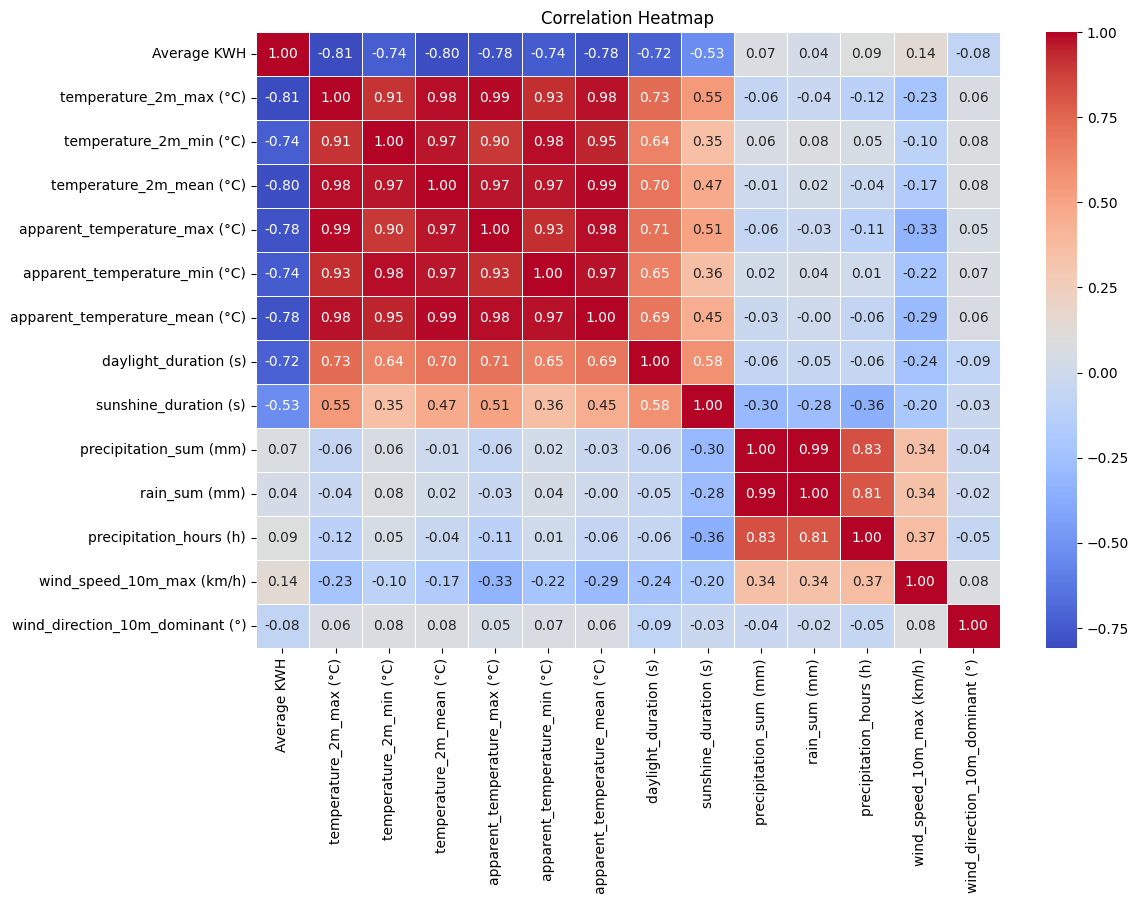

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap')
plt.show()

##Preparing for ARIMA
Select the features you want to include in your model and normalize if necessary:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Features for ARIMA
features = ['temperature_2m_mean (°C)',
            'precipitation_sum (mm)', 'rain_sum (mm)']

# Normalize features
scaler = StandardScaler()
merged_df[features] = scaler.fit_transform(merged_df[features])

# Prepare target and exogenous variables
y = merged_df['Average KWH']
X = merged_df[features]

##Dividing data into train and test sets using 80-20 ratio.

In [ ]:
# Determine the split point (e.g., 80% train, 20% test)
split_ratio = 0.8
split_point = int(len(merged_df) * split_ratio)

# Split the data into train and test sets
train_data = merged_df.iloc[:split_point]
test_data = merged_df.iloc[split_point:]

# Verify the split
print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

Training set size: 521
Test set size: 131


In [ ]:
train_data.head()

,Date,Average KWH,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°)
0,2012-05-18,0.177275,18/05/2012,51,15.1,8.0,0.260694,13.4,4.5,9.5,2012-05-18T05:03,2012-05-18T20:50,56791.92,21457.15,-0.504965,-0.493123,3,17.9,98
1,2012-05-19,0.177462,19/05/2012,3,16.8,9.6,0.470775,15.6,7.4,11.0,2012-05-19T05:02,2012-05-19T20:51,56957.59,36445.81,-0.584121,-0.572706,0,17.1,257
2,2012-05-20,0.189562,20/05/2012,51,15.0,7.2,0.068120,11.8,3.5,7.5,2012-05-20T05:01,2012-05-20T20:53,57120.40,20258.17,-0.320267,-0.307429,4,19.8,22
3,2012-05-21,0.229199,21/05/2012,3,17.2,8.4,0.330721,14.6,5.3,9.4,2012-05-21T04:59,2012-05-21T20:54,57280.18,15038.19,-0.584121,-0.572706,0,21.6,354
4,2012-05-22,0.170351,22/05/2012,3,23.0,9.6,1.013482,22.6,6.6,14.8,2012-05-22T04:58,2012-05-22T20:56,57436.73,51046.23,-0.584121,-0.572706,0,22.2,344


In [ ]:
test_data.head()

,Date,Average KWH,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°)
521,2013-10-21,0.199097,21/10/2013,61,16.6,12.6,0.768389,14.2,10.3,12.2,2013-10-21T07:35,2013-10-21T17:55,37197.62,3526.59,0.471295,0.488403,9,30.2,197
522,2013-10-22,0.203605,22/10/2013,55,16.8,14.6,0.960962,15.0,12.4,13.8,2013-10-22T07:37,2013-10-22T17:53,36970.86,0.00,1.262857,1.284235,13,24.8,184
523,2013-10-23,0.190616,23/10/2013,53,16.0,9.1,0.610828,12.5,6.9,10.6,2013-10-23T07:38,2013-10-23T17:51,36744.32,28110.59,0.365753,0.382292,9,30.8,221
524,2013-10-24,0.199400,24/10/2013,3,16.3,6.0,0.103134,14.6,4.1,9.2,2013-10-24T07:40,2013-10-24T17:49,36518.18,31554.39,-0.584121,-0.572706,0,17.4,151
525,2013-10-25,0.186333,25/10/2013,53,17.7,12.6,0.855922,15.6,10.4,12.8,2013-10-25T07:42,2013-10-25T17:47,36292.63,16346.56,-0.135569,-0.121735,3,26.8,184


##Selecting the appropriate hyperparameters (p,d,q) for an ARIMAX model typically involves a combination of domain knowledge, statistical tests, and empirical methods. Here are some common approaches to determine these hyperparameters:

1. Visual Inspection using ACF and PACF Plots
Autocorrelation Function (ACF): Helps to determine the value of
q (order of the Moving Average part).
Partial Autocorrelation Function (PACF): Helps to determine the value of
p (order of the Auto-Regressive part).
2. Differencing
Differencing: Helps to determine the value of
d (the number of differences needed to make the series stationary).
3. Grid Search with Cross-Validation
Use grid search over a range of values for
p,
d, and
q to find the combination that minimizes the AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion).


##Interpretation of ACF and PACF Plots
Determining
p (AR order):

Look at the PACF plot. Find the point (lag) where the plot first drops to zero or becomes insignificant.
The lag at which the PACF plot cuts off is the value of
p.
Determining
q (MA order):

Look at the ACF plot. Find the point (lag) where the plot first drops to zero or becomes insignificant.
The lag at which the ACF plot cuts off is the value of
q.

<Figure size 1200x600 with 0 Axes>

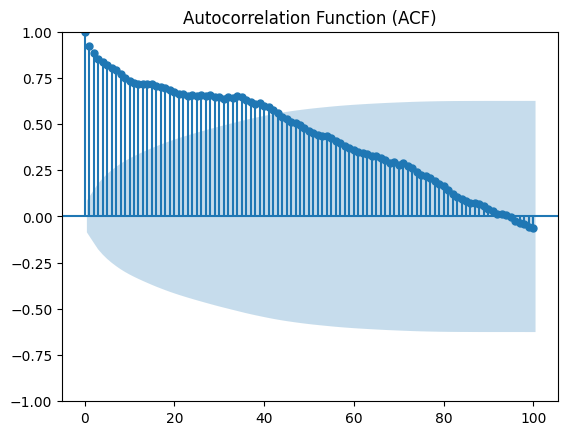

<Figure size 1200x600 with 0 Axes>

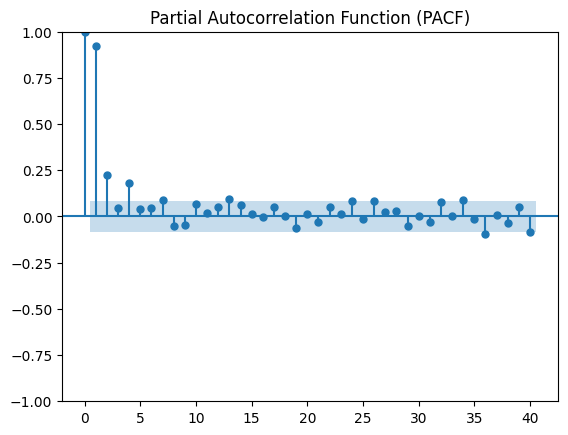

In [ ]:
# Apply ACF and PACF on the training data
train_values = train_data['Average KWH']

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(train_values, lags=100)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(train_values, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

#Now for hyperparameter 'd'.

In [ ]:
#First applying Augmented Dickey-Fuller test on original data
from statsmodels.tsa.stattools import adfuller
train_values = train_data['Average KWH']
# Perform Augmented Dickey-Fuller test
result = adfuller(train_values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.769034
p-value: 0.395940


As p-value> 0.05. So , we fail to reject null hypothesis and conclude that series is non-stationary. To make it stationary we use differencing.

In [ ]:
## FirstDifferencing
# Apply first differencing on the training data
y = train_data['Average KWH']
y_diff1 = y.diff().dropna()
result_diff1 = adfuller(y_diff1)
print('ADF Statistic (1st Diff): %f' % result_diff1[0])
print('p-value (1st Diff): %f' % result_diff1[1])

ADF Statistic (1st Diff): -8.899735
p-value (1st Diff): 0.000000


##Interpretation##


##Comparison with Critical Values:

-8.899735 < -3.50 (1% level)

-8.899735  < -2.89 (5% level)

-8.899735  < -2.58 (10% level)

Since -8.899735  is less than all these critical values, you can reject the null hypothesis at the 1%, 5%, and 10% significance levels.
## As p-value is less than 0.05 so no more differencing needed, and d=1.

#So hyperparameters are (p, d ,q) = (1,1,0)

                               SARIMAX Results                                
Dep. Variable:            Average KWH   No. Observations:                  521
Model:                 ARIMA(1, 1, 0)   Log Likelihood                1453.693
Date:                Mon, 05 Aug 2024   AIC                          -2903.386
Time:                        17:16:35   BIC                          -2894.878
Sample:                             0   HQIC                         -2900.053
                                - 521                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2549      0.035     -7.356      0.000      -0.323      -0.187
sigma2         0.0002   1.01e-05     21.668      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.16   Jarque-

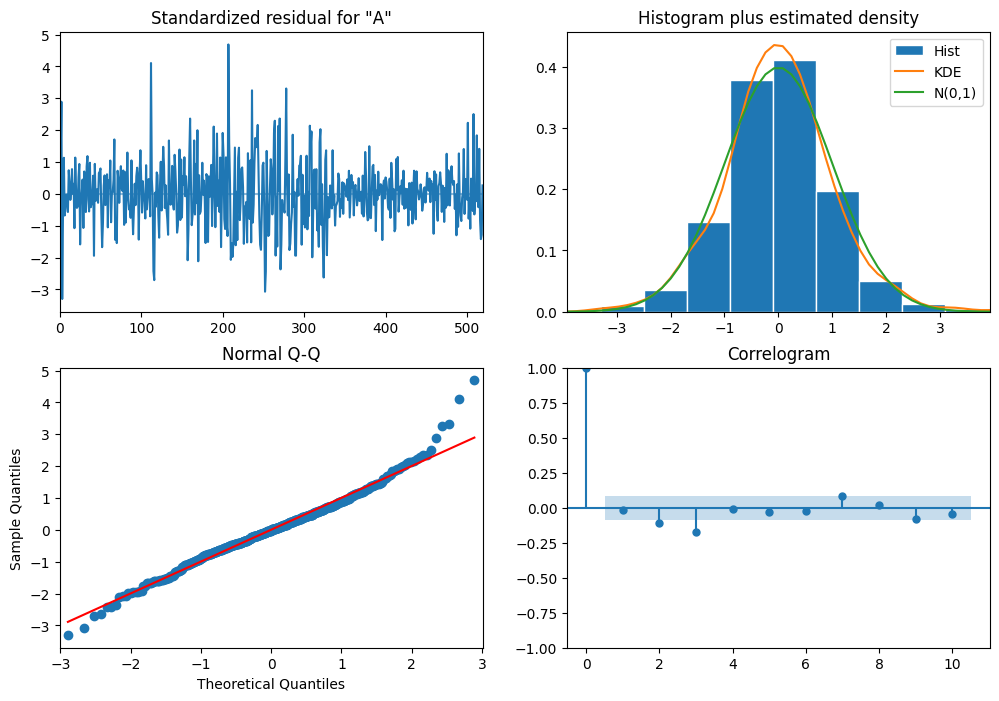

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming d = 1 based on the ADF test results
model = ARIMA(train_data['Average KWH'], order=(1, 1, 0))
model_fit = model.fit()

# Summarize the model
print(model_fit.summary())

# Plot diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

#Another method of finding hyperparameters is grid search.

In [ ]:
#grid search
import itertools
import statsmodels.api as sm

# Define the range for p, d, and q
p = d = q = range(0, 7)
pdq = list(itertools.product(p, d, q))
y1 = train_data['Average KWH']
X1 = train_data[features]
# Find the best combination of parameters
best_aic = float("inf")
best_order = None
best_model = None

for order in pdq:
    try:
        model = sm.tsa.ARIMA(y1, order=order, exog=X1)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order
            best_model = model_fit
    except:
        continue

print(f"Best AIC: {best_aic}")
print(f"Best Order: {best_order}")

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Like

Best AIC: -2979.912620072899
Best Order: (1, 0, 3)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##Best AIC: -2979.912620072899
##Best Order: (1, 0, 3)

                               SARIMAX Results                                
Dep. Variable:            Average KWH   No. Observations:                  521
Model:                 ARIMA(1, 0, 3)   Log Likelihood                1472.597
Date:                Mon, 05 Aug 2024   AIC                          -2933.194
Time:                        17:49:52   BIC                          -2907.660
Sample:                             0   HQIC                         -2923.192
                                - 521                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2050      0.019     10.872      0.000       0.168       0.242
ar.L1          0.9829      0.008    115.924      0.000       0.966       1.000
ma.L1         -0.2959      0.036     -8.307      0.0

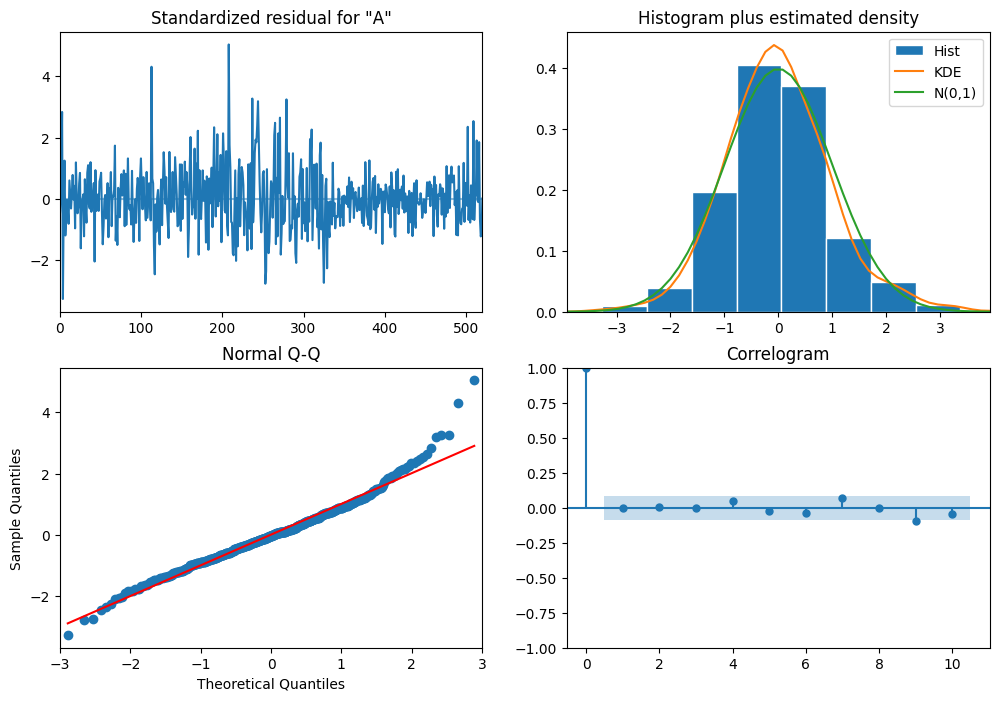

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data['Average KWH'], order=(1, 0, 3))
model_fit = model.fit()

# Summarize the model
print(model_fit.summary())

# Plot diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

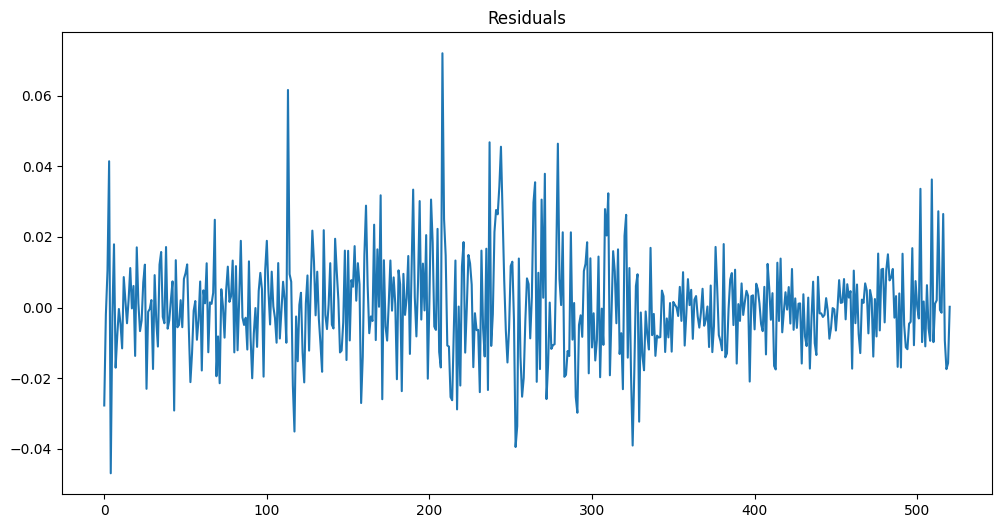

<Figure size 1200x600 with 0 Axes>

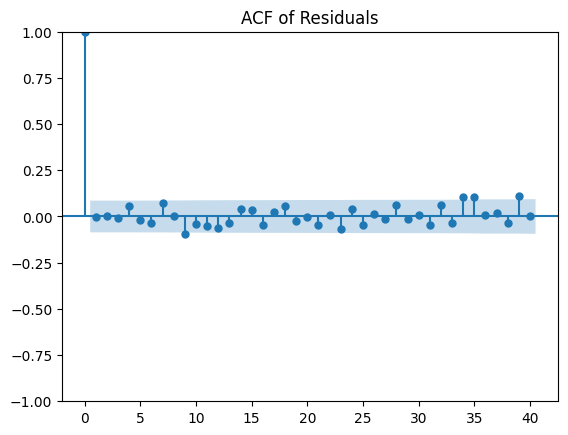

<Figure size 1200x600 with 0 Axes>

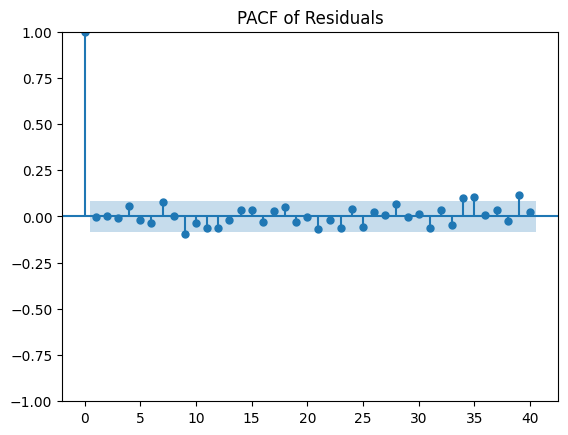

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot residuals
residuals = model_fit.resid

plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Plot ACF and PACF of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40)
plt.title('ACF of Residuals')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(residuals, lags=40)
plt.title('PACF of Residuals')
plt.show()

ACF Plot:

The ACF plot shows that most of the autocorrelations fall within the confidence interval, suggesting that there is no significant autocorrelation left in the residuals, which is a good sign.
There might be a few lags just at or slightly outside the confidence bounds, but they do not appear to be a consistent pattern of significant lags.
PACF Plot:

The PACF plot also shows that most of the partial autocorrelations fall within the confidence interval.
There is no clear pattern of significant lags, indicating that the residuals do not show significant partial autocorrelation.
Conclusion
The ACF and PACF plots of the residuals suggest that the ARIMA model has done a good job in capturing the underlying data pattern, as the residuals appear to be uncorrelated.
Since the residuals do not exhibit significant autocorrelation, it indicates that the model does not have systematic patterns left unmodeled, which is a desirable outcome.

**Applying ARIMA without log transformation**

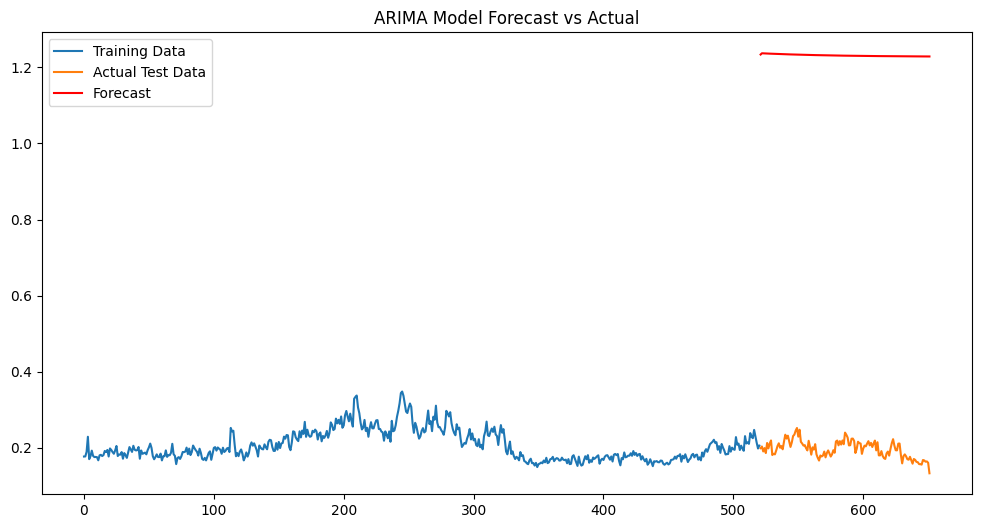

Mean Absolute Error (MAE): 1.0342373649093475
Root Mean Squared Error (RMSE): 1.034458854878746
Mean Absolute Percentage Error (MAPE): 533.02%


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
y1 = train_data['Average KWH']
X1 = train_data[features]


# Forecasting
n_periods = len(test_data)
forecast_log = model_fit.forecast(steps=n_periods)

# Transform forecast back to original scale
forecast_series = np.exp(forecast_log)  # if log transformation was used
forecast_series = pd.Series(forecast_series, index=test_data.index)

# Plotting the forecast against actual values
plt.figure(figsize=(12, 6))
plt.plot(train_data['Average KWH'], label='Training Data')
plt.plot(test_data['Average KWH'], label='Actual Test Data')
plt.plot(forecast_series, label='Forecast', color='red')
plt.legend(loc='upper left')
plt.title('ARIMA Model Forecast vs Actual')
plt.show()

# Calculate MAE and RMSE
mae = mean_absolute_error(test_data['Average KWH'], forecast_series)
rmse = mean_squared_error(test_data['Average KWH'], forecast_series, squared=False)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAPE
mape = np.mean(np.abs((test_data['Average KWH'] - forecast_series) / test_data['Average KWH'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


**Applying ARIMA with log transformation.**

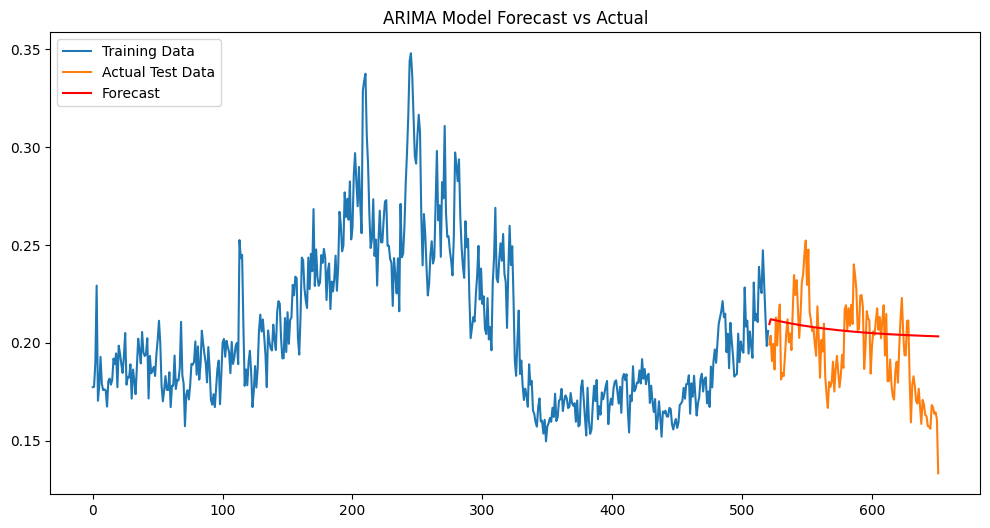

Mean Absolute Error (MAE): 0.018925952104818764
Root Mean Squared Error (RMSE): 0.02324984617868854
Mean Absolute Percentage Error (MAPE): 10.27%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Log transform using .loc to avoid SettingWithCopyWarning
train_data.loc[:, 'log_Average KWH'] = np.log(train_data['Average KWH'])
test_data.loc[:, 'log_Average KWH'] = np.log(test_data['Average KWH'])


# Set ARIMA model parameters (p, d, q)
p, d, q = 1, 0, 3

# Fit ARIMA model
model = ARIMA(train_data['log_Average KWH'], order=(p, d, q))
model_fit = model.fit()

# Forecast
n_periods = len(test_data)
forecast_log = model_fit.forecast(steps=n_periods)

# Back-transform
forecast = np.exp(forecast_log)
forecast_series = pd.Series(forecast, index=test_data.index)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data['Average KWH'], label='Training Data')
plt.plot(test_data['Average KWH'], label='Actual Test Data')
plt.plot(forecast_series, label='Forecast', color='red')
plt.legend(loc='upper left')
plt.title('ARIMA Model Forecast vs Actual')
plt.show()

# Calculate MAE, RMSE, MAPE
mae = mean_absolute_error(test_data['Average KWH'], forecast_series)
rmse = mean_squared_error(test_data['Average KWH'], forecast_series, squared=False)
mape = np.mean(np.abs((test_data['Average KWH'] - forecast_series) / test_data['Average KWH'])) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


##**SARIMA MODEL**

#Check for seasonality.Time Series Plot:
Plot the time series data and visually inspect for repeating patterns at regular intervals.

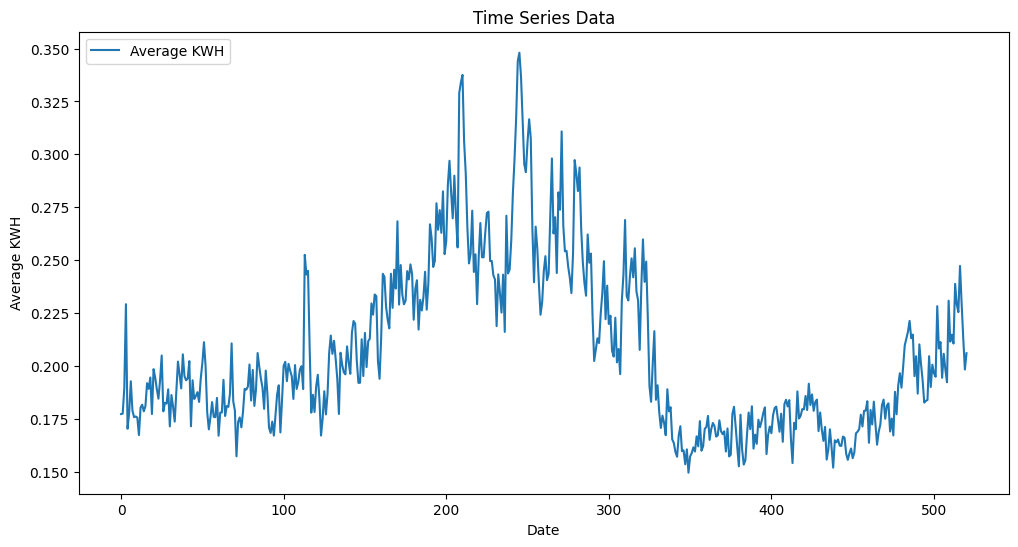

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['Average KWH'], label='Average KWH')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Average KWH')
plt.legend(loc='upper left')
plt.show()

Seasonal Decomposition of Time Series (STL):
Decompose the time series into trend, seasonal, and residual components.

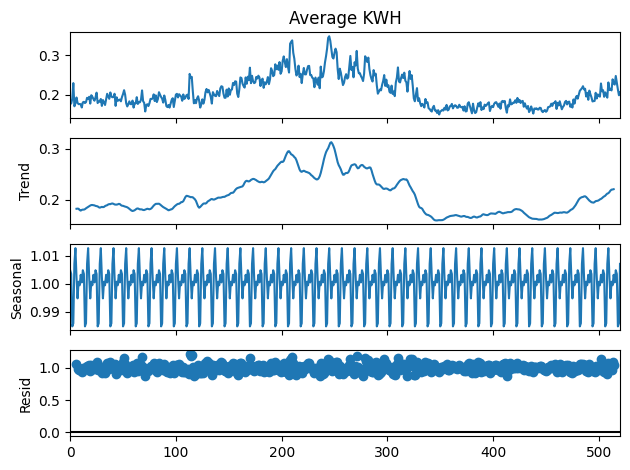

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(train_data['Average KWH'], model='multiplicative', period=12)  # Adjust the period according to your data frequency
result.plot()
plt.show()


Fourier Transform: Fourier transform can be used to detect dominant frequencies (seasonal cycles) in the data.

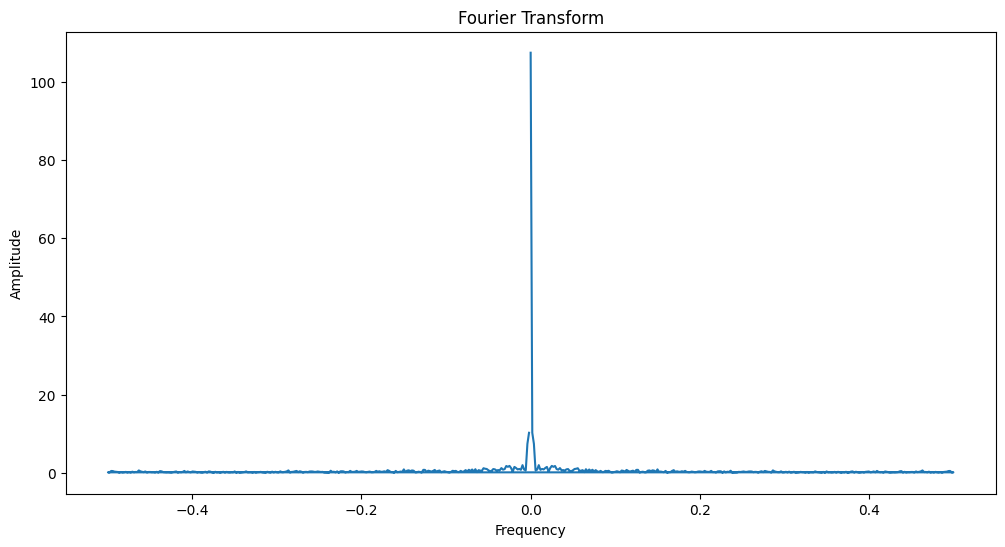

In [ ]:
import numpy as np

# Perform Fourier Transform
fft = np.fft.fft(train_data['Average KWH'])
fft_freq = np.fft.fftfreq(len(train_data['Average KWH']))

# Plot the FFT result
plt.figure(figsize=(12, 6))
plt.plot(fft_freq, np.abs(fft))
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


#Seasonal Differencing:
Difference the data at the seasonal lag (e.g., 12 for monthly data) to remove seasonality and check for stationarity.

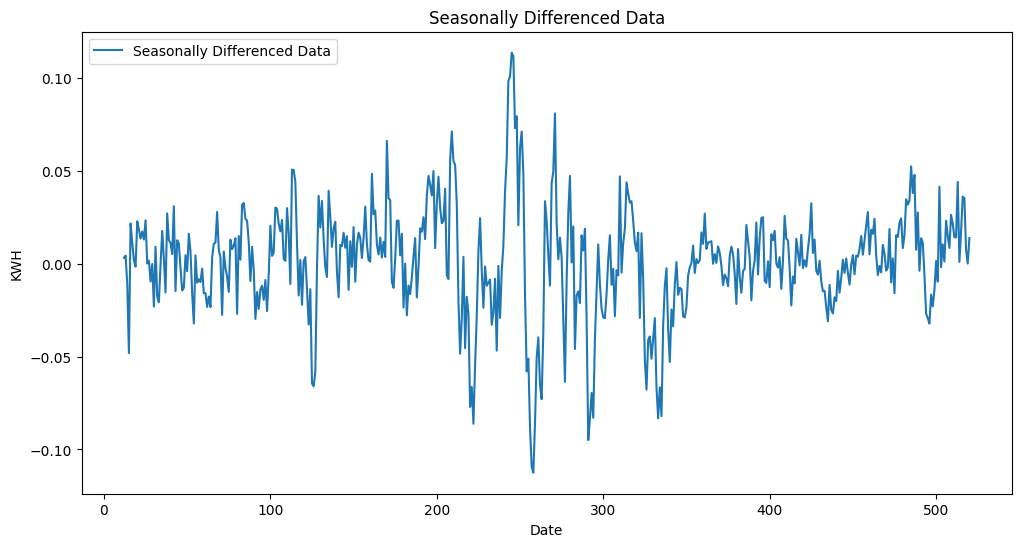

In [ ]:
seasonal_diff = train_data['Average KWH'].diff(12).dropna()

plt.figure(figsize=(12, 6))
plt.plot(seasonal_diff, label='Seasonally Differenced Data')
plt.title('Seasonally Differenced Data')
plt.xlabel('Date')
plt.ylabel('KWH')
plt.legend(loc='upper left')
plt.show()

Augmented Dickey-Fuller Test: Apply the ADF test on the seasonally differenced data to check for stationarity.

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(seasonal_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.667448
p-value: 0.000001


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


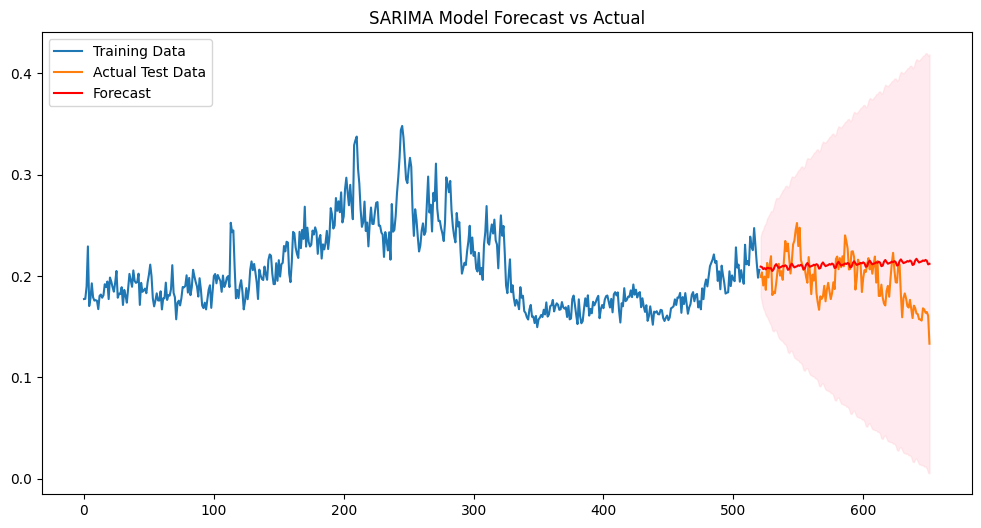

Mean Absolute Error (MAE): 0.02132322075349955
Root Mean Squared Error (RMSE): 0.02727755115082864
Mean Absolute Percentage Error (MAPE): 11.76%


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Define the model
p, d, q = 0, 1, 2  # These are from previous ARIMA fitting
P, D, Q, s = 1, 1, 1, 12  # Seasonal parameters and seasonal period

model = SARIMAX(train_data['Average KWH'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Forecast
n_periods = len(test_data)
forecast = model_fit.get_forecast(steps=n_periods)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data['Average KWH'], label='Training Data')
plt.plot(test_data['Average KWH'], label='Actual Test Data')
plt.plot(forecast_values, label='Forecast', color='red')
plt.fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend(loc='upper left')
plt.title('SARIMA Model Forecast vs Actual')
plt.show()

# Evaluate the forecast
mae = mean_absolute_error(test_data['Average KWH'], forecast_values)
rmse = mean_squared_error(test_data['Average KWH'], forecast_values, squared=False)
mape = np.mean(np.abs((test_data['Average KWH'] - forecast_values) / test_data['Average KWH'])) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


#Hyperparameter tuning for SARIMA using Grid search

Best SARIMA parameters: (2, 0, 1) x (0, 0, 0, 12) with AIC: -2914.9671625142882


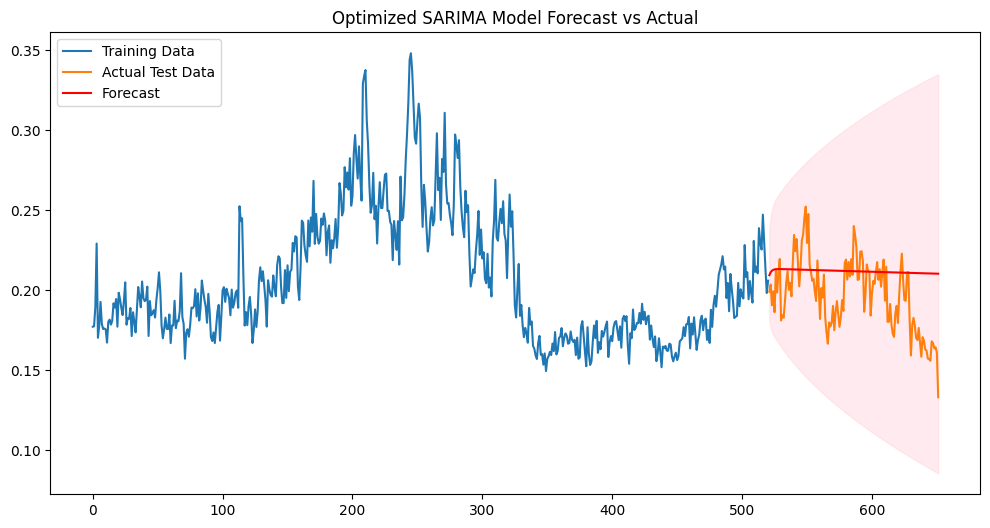

KeyError: 'KWH/hh'

In [ ]:
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the p, d, q, P, D, Q parameters to take any value between 0 and 2
p = d = q = range(0, 3)
P = D = Q = range(0, 3)
s = [12]  # Seasonality period

# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s[0]) for x in list(itertools.product(P, D, Q))]

best_aic = float('inf')
best_param = None
best_seasonal_param = None

warnings.filterwarnings("ignore")  # specify to ignore warning messages

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            mod = SARIMAX(train_data['Average KWH'],
                          order=param,
                          seasonal_order=seasonal_param,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

            results = mod.fit()

            if results.aic < best_aic:
                best_aic = results.aic
                best_param = param
                best_seasonal_param = seasonal_param

        except:
            continue

print(f'Best SARIMA parameters: {best_param} x {best_seasonal_param} with AIC: {best_aic}')

# Fit the best model
best_model = SARIMAX(train_data['Average KWH'],
                     order=best_param,
                     seasonal_order=best_seasonal_param,
                     enforce_stationarity=False,
                     enforce_invertibility=False)

best_model_fit = best_model.fit()



##**Best SARIMA parameters: (2, 0, 1) x (0, 0, 0, 12) with AIC: -2914.9671625142882**

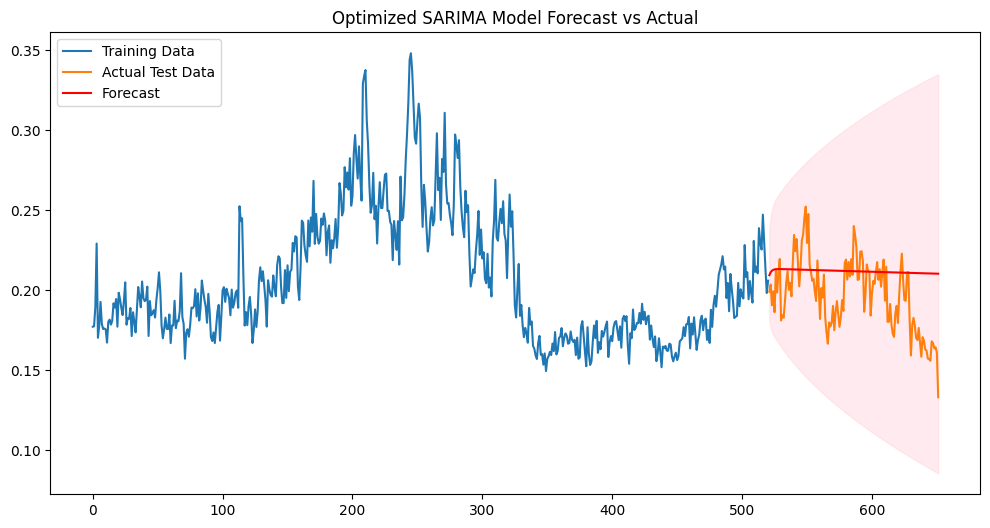

Mean Absolute Error (MAE): 0.02090447006453094
Root Mean Squared Error (RMSE): 0.026332504109032772
Mean Absolute Percentage Error (MAPE): 11.53%


In [ ]:
# Forecast
n_periods = len(test_data)
forecast = best_model_fit.get_forecast(steps=n_periods)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data['Average KWH'], label='Training Data')
plt.plot(test_data['Average KWH'], label='Actual Test Data')
plt.plot(forecast_values, label='Forecast', color='red')
plt.fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend(loc='upper left')
plt.title('Optimized SARIMA Model Forecast vs Actual')
plt.show()

# Evaluate the forecast
mae = mean_absolute_error(test_data['Average KWH'], forecast_values)
rmse = mean_squared_error(test_data['Average KWH'], forecast_values, squared=False)
mape = np.mean(np.abs((test_data['Average KWH'] - forecast_values) / test_data['Average KWH'])) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


##TRY THIS INSTEAD


In [ ]:
from sklearn.preprocessing import MinMaxScaler
#scaling
scaler = MinMaxScaler()
weather_scaled = scaler.fit_transform(merged_df[['temperature_2m_max (°C)','wind_speed_10m_max (km/h)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

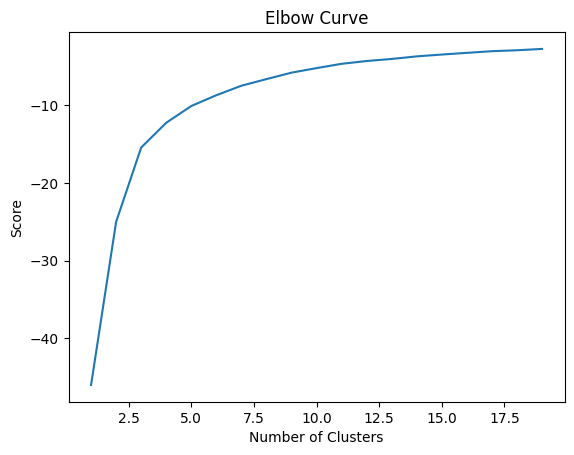

In [ ]:
from sklearn.cluster import KMeans
# optimum K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

score = [kmeans[i].fit(weather_scaled).score(weather_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans.fit(weather_scaled)
merged_df['weather_cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


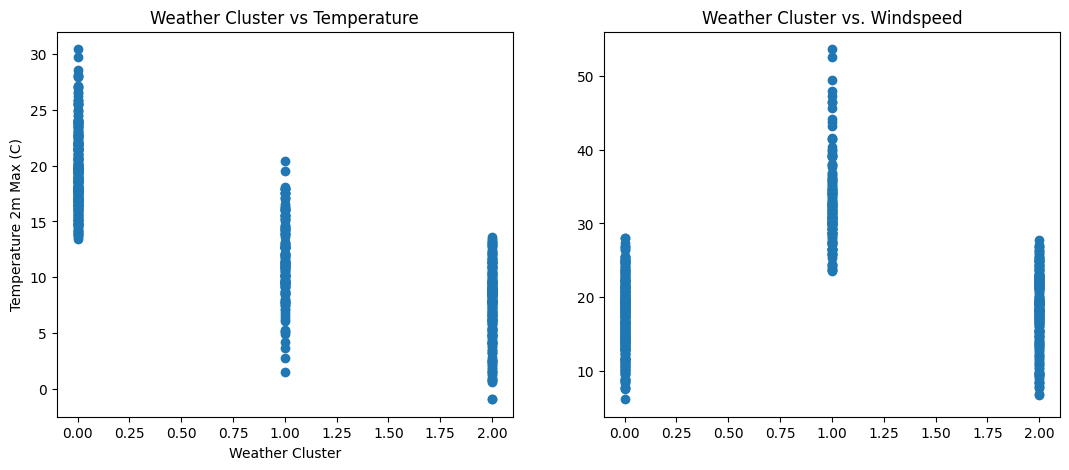

In [ ]:


# Rename the column to remove or replace the degree symbol
merged_df.rename(columns={'temperature_2m_max (°C)': 'temperature_2m_max_C'}, inplace=True)

# Now you can use the new column name for plotting
# Cluster Relationships with weather variables
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.scatter(merged_df['weather_cluster'], merged_df['temperature_2m_max_C'])
plt.xlabel('Weather Cluster')
plt.ylabel('Temperature 2m Max (C)')
plt.title('Weather Cluster vs Temperature')
plt.subplot(1, 3, 2)
plt.scatter(merged_df['weather_cluster'], merged_df['wind_speed_10m_max (km/h)'])
plt.title('Weather Cluster vs. Windspeed')
plt.show()

In [ ]:
model_data = merged_df[['Average KWH','weather_cluster']]
train_data = model_data.iloc[0:(len(model_data)-30)]
test_data = model_data.iloc[len(train_data):(len(model_data)-1)]

In [ ]:
train_data.head()

,Average KWH,weather_cluster
0,0.177275,0
1,0.177462,0
2,0.189562,0
3,0.222067,0
4,0.163837,0


<Axes: >

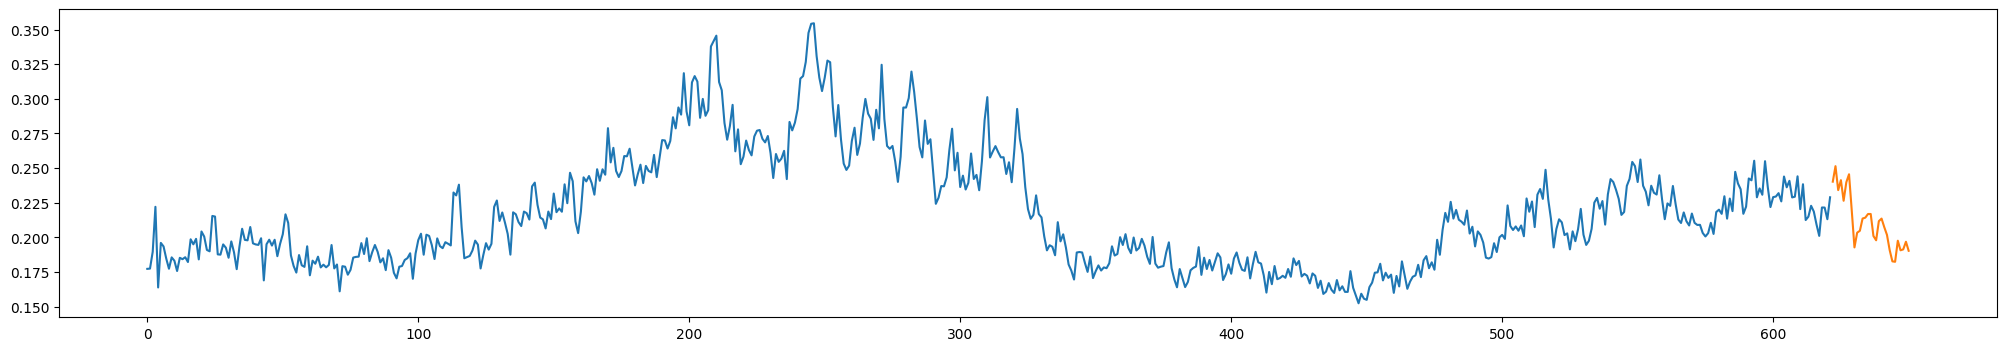

In [ ]:
train_data['Average KWH'].plot(figsize=(25,4))
test_data['Average KWH'].plot(figsize=(25,4))

In [ ]:
test_data.head(1)

,Average KWH,weather_cluster
622,0.240201,2


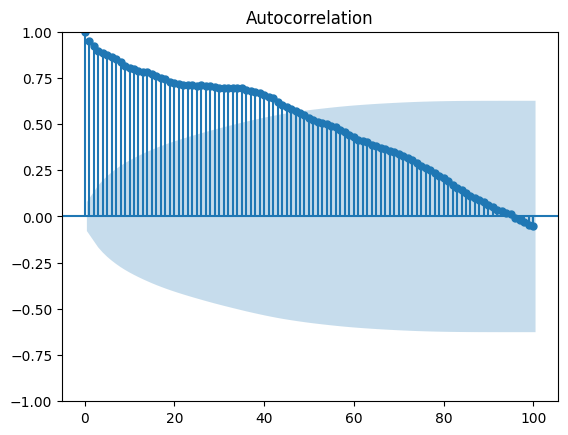

In [ ]:
plot_acf(train_data['Average KWH'],lags=100)
plt.show()

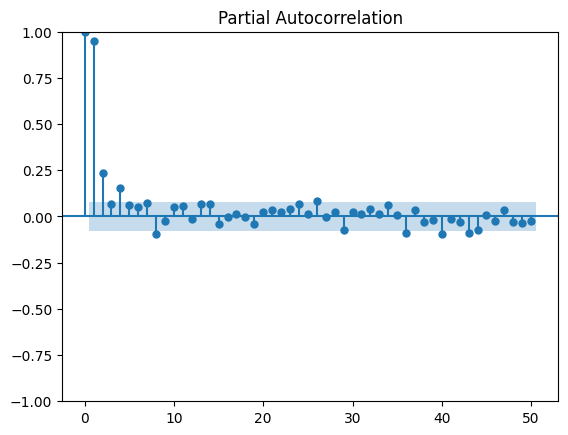

In [ ]:
plot_pacf(train_data['Average KWH'],lags=50)
plt.show()

In [ ]:
import statsmodels.api as sm
t = sm.tsa.adfuller(train_data['Average KWH'], autolag='AIC')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                  -2.268305
p-value                          0.182394
#Lags Used                       7.000000
Number of Observations Used    614.000000
dtype: float64

In [ ]:
# function for differencing
def difference(dataset, interval):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset.iloc[i] - dataset.iloc[i - interval]
        diff.append(value)
    return diff

In [ ]:
t  = sm.tsa.adfuller(difference(train_data['Average KWH'],1), autolag='AIC')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                -9.079790e+00
p-value                        4.085540e-15
#Lags Used                     1.200000e+01
Number of Observations Used    6.080000e+02
dtype: float64

#Seasonal Decomposition

The seasonal component is quite low while the trend is quite strong with obvious dips in electricity consumption during summers i.e. April to September. This may be attributed to longer days during summer.

In [ ]:
s = sm.tsa.seasonal_decompose(train_data['Average KWH'],period=12)

<Axes: >

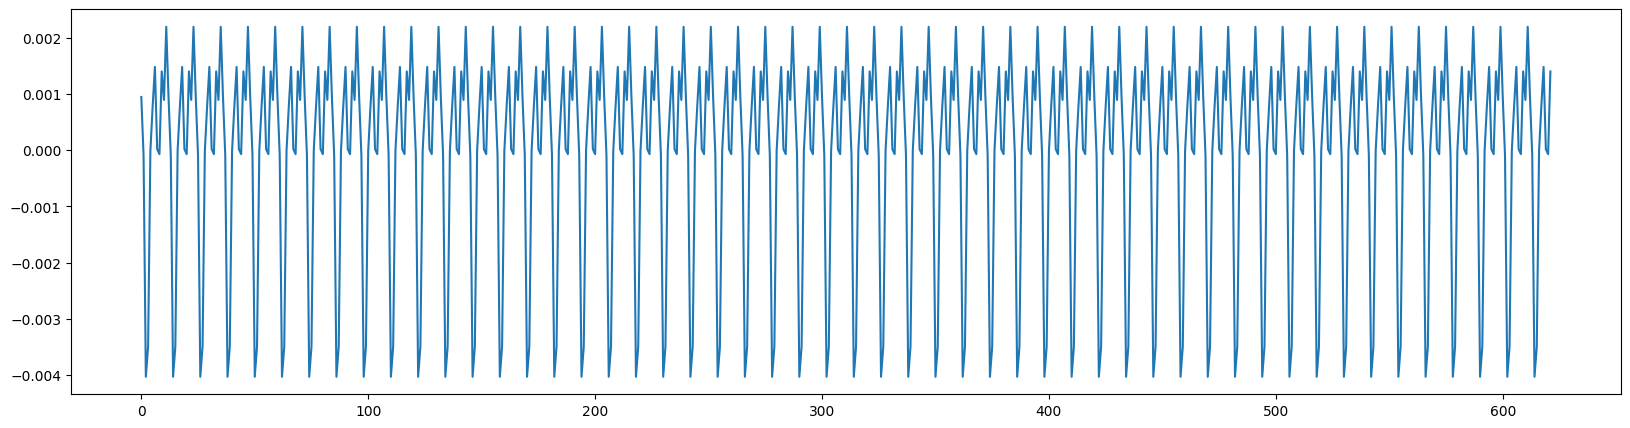

In [ ]:
s.seasonal.plot(figsize=(20,5))

<Axes: >

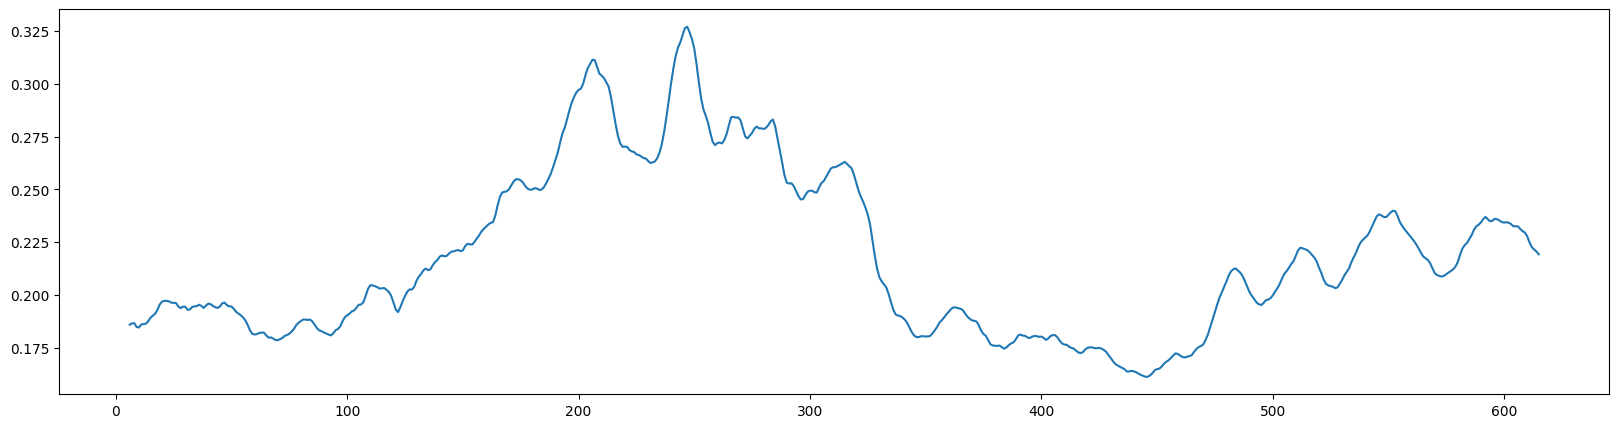

In [ ]:
s.trend.plot(figsize=(20,5))

<Axes: >

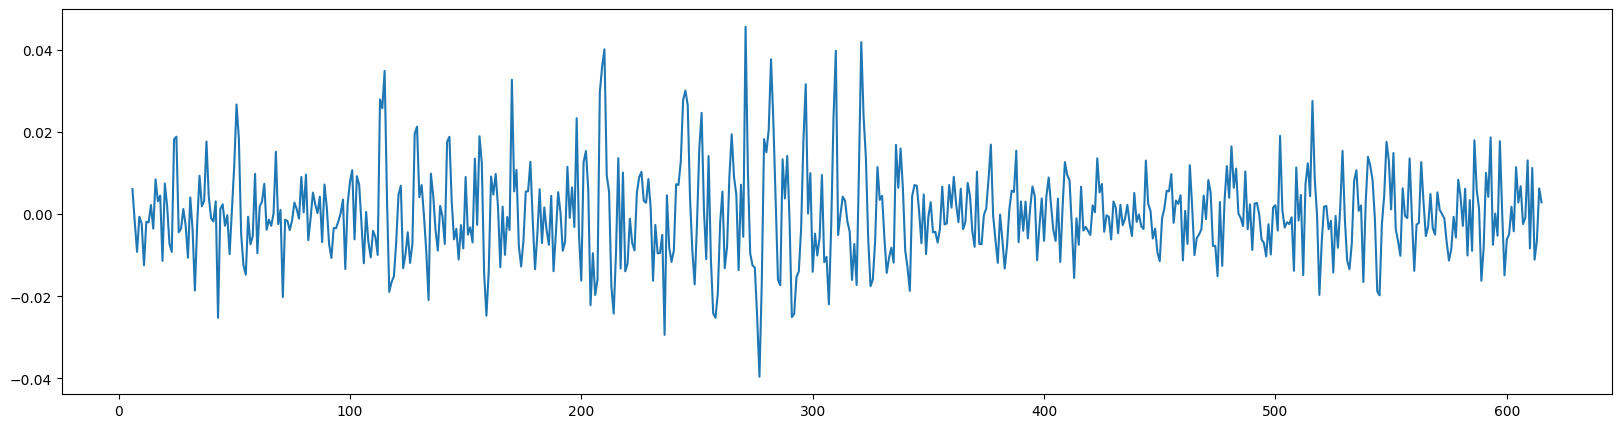

In [ ]:
s.resid.plot(figsize=(20,5))

In [ ]:

import statsmodels.api as sm

# Define endogenous (dependent) variable
endog = train_data['Average KWH']

# Define exogenous (independent) variables without adding a constant
exog = train_data[['weather_cluster']]

# Create the SARIMAX model without the trend component
mod = sm.tsa.statespace.SARIMAX(endog=endog, exog=exog, order=(7, 1, 1), seasonal_order=(1, 1, 0, 12))

# Fit the model
model_fit = mod.fit()

# Summarize the model
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         Average KWH   No. Observations:                  622
Model:             SARIMAX(7, 1, 1)x(1, 1, [], 12)   Log Likelihood                1692.264
Date:                             Mon, 05 Aug 2024   AIC                          -3362.529
Time:                                     22:48:57   BIC                          -3313.999
Sample:                                          0   HQIC                         -3343.650
                                             - 622                                         
Covariance Type:                               opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
weather_cluster     0.0042      0.001      4.061      0.000       0.002       0.006
ar.L1              -0.1099      0.379     -0.290      0.772      -0.852       0.632
ar.L2              -0.0888      0.103     -0.861      0.389      -0.291       0.113
ar.L3              -0.1521      0.059     -2.576      0.010      -0.268      -0.036
ar.L4              -0.0590      0.078     -0.754      0.451      -0.212       0.094
ar.L5              -0.0365      0.051     -0.714      0.475      -0.137       0.064
ar.L6              -0.0460      0.039     -1.178      0.239      -0.122       0.031
ar.L7               0.1094      0.047      2.335      0.020       0.018       0.201
ma.L1              -0.1450      0.382     -0.379      0.704      -0.894       0.604
ar.S.L12           -0.5213      0.032    -16.333      0.000      -0.584      -0.459
sigma2              0.0002   1.08e-05     20.745      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                27.44
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##Fitting Model

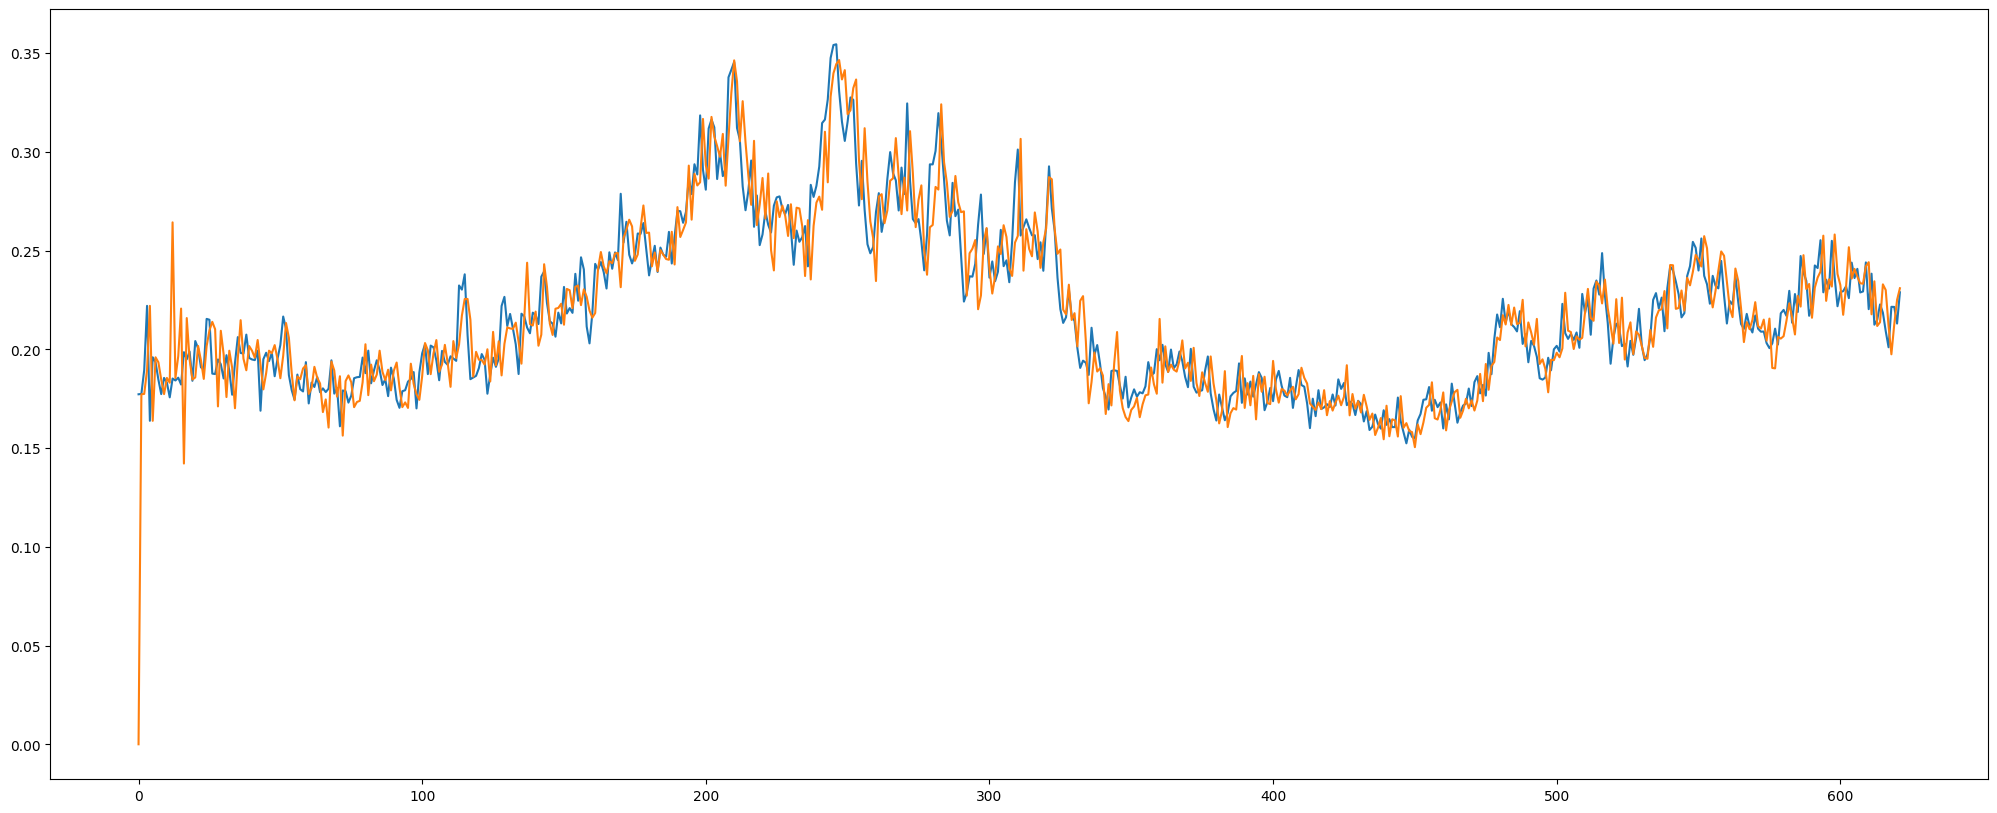

In [ ]:
train_data['Average KWH'].plot(figsize=(25,10))
model_fit.fittedvalues.plot()
plt.show()

##**Prediction**

In [ ]:


import statsmodels.api as sm
# Define endogenous (dependent) variable
endog = train_data['Average KWH']
# Define exogenous (independent) variables
exog = train_data[['weather_cluster']]
# Add a constant to the exogenous variables
exog = sm.add_constant(exog)
# Create the SARIMAX model with the exogenous data
mod = sm.tsa.statespace.SARIMAX(endog=endog, exog=exog, order=(7, 1, 1), seasonal_order=(1, 1, 0, 12))
# Fit the model
model_fit = mod.fit()
# Summarize the model
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                         Average KWH   No. Observations:                  622
Model:             SARIMAX(7, 1, 1)x(1, 1, [], 12)   Log Likelihood                1692.404
Date:                             Mon, 05 Aug 2024   AIC                          -3360.808
Time:                                     23:04:56   BIC                          -3307.866
Sample:                                          0   HQIC                         -3340.212
                                             - 622                                         
Covariance Type:                               opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.357e-11   6.91e-08      0.001      0.999   -1.35e-07    1.35e-07
weather_clus

In [ ]:
exog.tail()

,const,weather_cluster
617,1.0,1
618,1.0,1
619,1.0,1
620,1.0,2
621,1.0,2


In [ ]:
predict = model_fit.predict(start = len(train_data),end = len(train_data)+len(test_data)-1,exog = sm.add_constant(test_data[['weather_cluster']]))
test_data['predicted'] = predict.values
test_data.head(5)

<ipython-input-89-69943d5f3c06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted'] = predict.values


,Average KWH,weather_cluster,predicted,residual
622,0.240201,2,0.206320,0.033881
623,0.251398,1,0.202515,0.048883
624,0.234109,1,0.190555,0.043554
625,0.241317,1,0.198759,0.042558
626,0.226431,1,0.202054,0.024377


In [ ]:
test_data['residual'] = abs(test_data['Average KWH']-test_data['predicted'])
MAE = test_data['residual'].sum()/len(test_data)
MAPE = (abs(test_data['residual'])/test_data['Average KWH']).sum()*100/len(test_data)
print("MAE:", MAE)
print("MAPE:", MAPE)

MAE: 0.023392346640558087
MAPE: 10.746866343180326


<ipython-input-80-5edc4236f0f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['residual'] = abs(test_data['Average KWH']-test_data['predicted'])


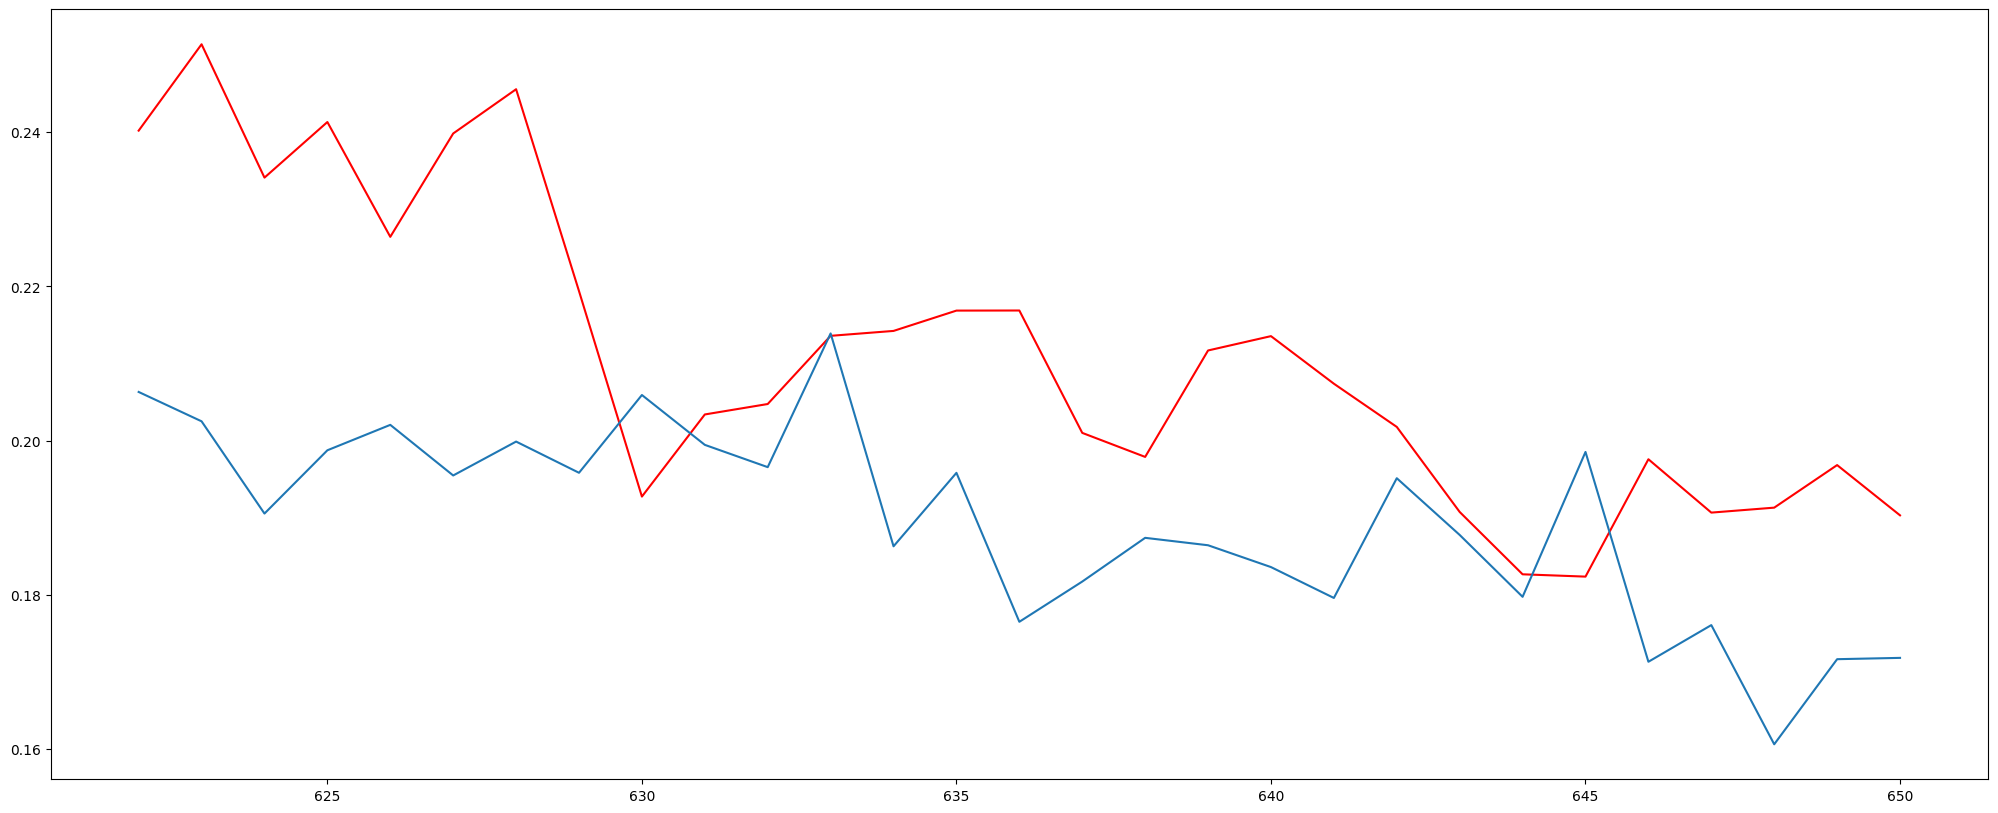

In [ ]:
test_data['Average KWH'].plot(figsize=(25,10),color = 'red')
test_data['predicted'].plot()
plt.show()

<Axes: >

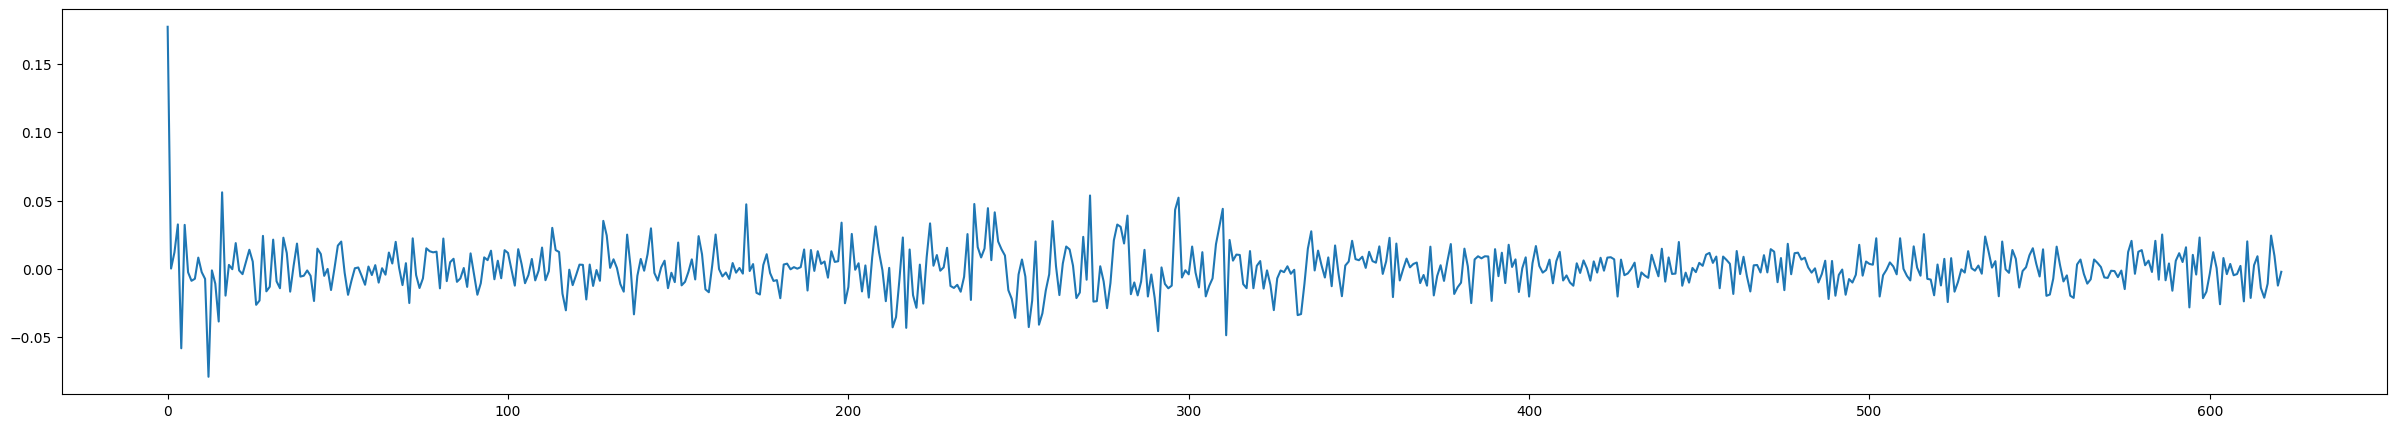

In [ ]:
model_fit.resid.plot(figsize= (30,5))

<Axes: >

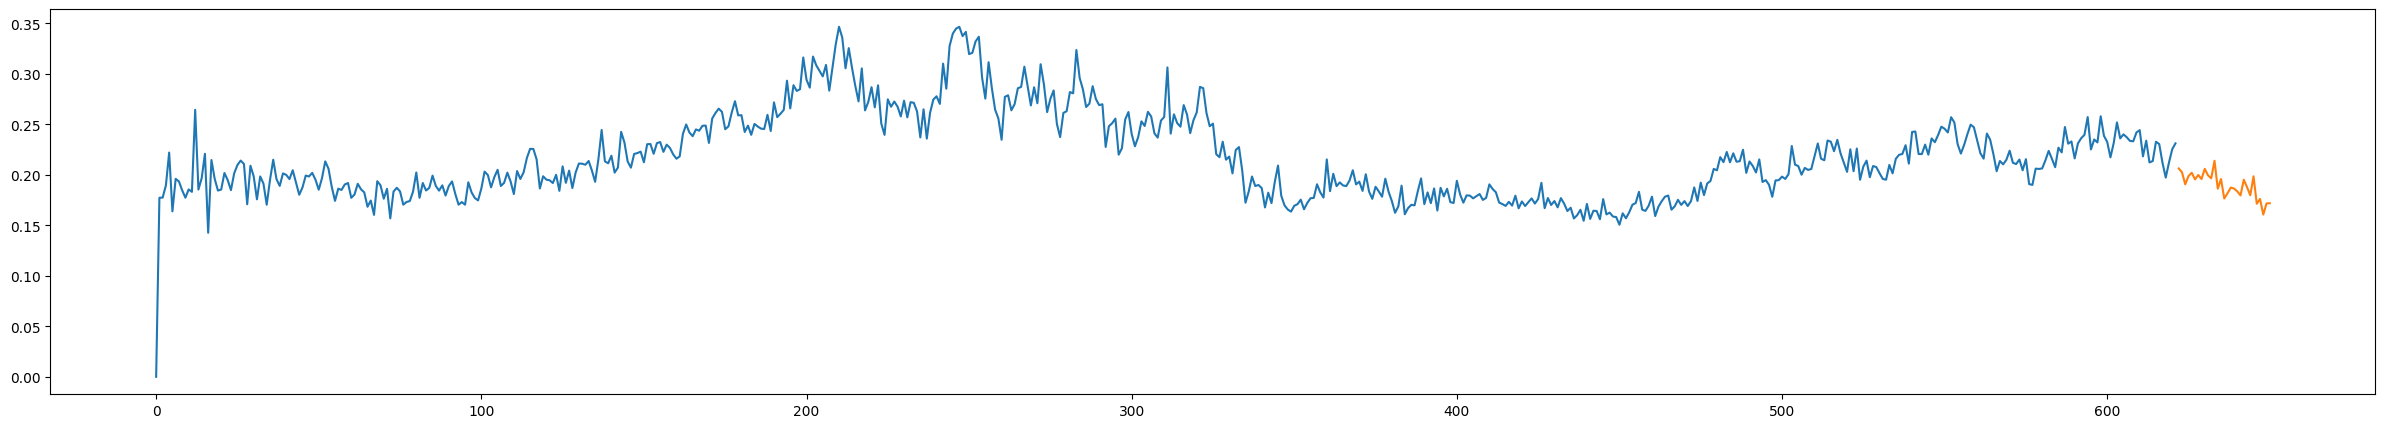

In [ ]:
model_fit.fittedvalues.plot(figsize = (30,5))
test_data.predicted.plot()

In [ ]:
test_data['predicted'].tail(5)

646    0.171339
647    0.176093
648    0.160641
649    0.171673
650    0.171844
Name: predicted, dtype: float64